<a href="https://colab.research.google.com/github/denniesbor/TwitterPython/blob/RawNotebooks/EmotionAndSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Background
This section will compute the sentiment and emotion analysis of the Twitter data on the Kenyan political space. Kenya is heading for a general election, and in the last week, the presidential aspirants were rushing to appoint their deputies in a bid to gain more political traction. We will analyse how opinionated Kenyans were on the deputy choices of the political bigwigs.

While querying, we narrowed our topic to politics by specifying keywords regarding politicians, political figures and parties. However, some users spam on the political trends to advertise their products, gain followers or give alternate opinions, which might skew our model results.

### **Sentiment Analysis**
Sentiment analysis is the task of determining the emotional value of a given expression in natural language. We will compute the Polarity and Subjectivity of the texts using rule-based models: TextBlob or Vader.

Polarity analysis determines whether a word, phrase, or document is positive, negative, or neutral. The scores range from -1 as very negative to +1 as very positive and 0 as neutral. 

On the hand, the subjectivity score ranges from 0 for objective texts to 1 for more subjective ones. The emotional (subjective) texts are often not facts but are highly influenced by the writer's feelings and emotions. It is essential to find what kind of emotions the user portrays.

### **Emotion Analysis**
Sentiment analysis may fail to capture the true feelings of the tweeter. The technique of discovering and interpreting the underlying emotions portrayed in textual data is known as emotion analysis.

For text emotion, we will use  Hugging Face Model Hub's EmoRoberta. EmoRoberta leverages Roberta to perform Emotion classification into 28 categories of Emotion.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import wordcloud
import matplotlib.pyplot as plt


In [ ]:
# read data

df = pd.read_csv('/content/drive/MyDrive/Summer2022/kenya_politico_clean.csv')

In [ ]:
# Displaying some tweets for visual inspection

for i,tweet in enumerate(df.sample(5, random_state=200)['tweet_text']):
    print(i+1, tweet, '\n')

1 even martha karua today note that in meru azimio have only one vote for peter munya 

2 truth be say kenya kwanza be the way 

3 god be on hustler side walahi keep pray for dp badly need ruto s win 

4 the patience have for ruto 

5 karua begin central kenya tour after nomination as raila s running mate 



## 1. Sentiment Analysis with TextBlob
TextBlob is a Lexicon-based sentiment analyzer. It has some predefined rules, or we can say word and weight dictionary, where it has some scores that help calculate a sentence's polarity and subjectivity.

In [ ]:
# sentiment analysis polarity & subjectivity
from textblob import TextBlob

In [ ]:
# polarity scores

def get_polarity (text):
  """ Function to get the polarity score. 

  Parameters
  ----------
  text: str
    tweet text
    
  Returns
  -------
  score: float
    polarity score
    
  """

  return TextBlob(text).sentiment.polarity

# get subjectivity

def get_subjectivity (text):
  """ Function to get the subjectivity score. 

  Parameters
  ----------
  text: str
    cleaned text
    
  Returns
  -------
  score: float 
    subjectivity score.
    
  """

  return TextBlob(text).sentiment.subjectivity


In [ ]:
# apply the subjectivity and polarity functions on the df

df['subjectivity'] = df['tweet_text'].apply(get_subjectivity)
df['polarity'] = df['tweet_text'].apply(get_polarity)

In [ ]:
df.describe()

,Unnamed: 0,author_id,tweet_id,length_tweet,subjectivity,polarity
count,13983.000000,1.398300e+04,1.398300e+04,13983.000000,13983.000000,13983.000000
mean,6999.435171,7.341725e+17,1.526616e+18,134.790102,0.337336,0.077635
std,4041.903807,6.365029e+17,6.887827e+14,68.096987,0.308182,0.263440
min,0.000000,1.177730e+07,1.525515e+18,5.000000,0.000000,-1.000000
25%,3498.500000,1.605626e+09,1.525936e+18,78.000000,0.000000,0.000000
50%,6999.000000,9.071378e+17,1.526631e+18,124.000000,0.344444,0.000000
75%,10500.500000,1.352906e+18,1.527315e+18,194.000000,0.550000,0.200000
max,13999.000000,1.527613e+18,1.527624e+18,284.000000,1.000000,1.000000


Computing measures of central tendency and dispersion shows the polarity has a mean of 0.07, which is neutral, whereas the subjectivity of the data has a mean of 0.33.

In [ ]:
# obtain the sentiment class from polarity scores

df['sentiment'] = np.where(df['polarity'] > 0, 'positive', 
         (np.where(df['polarity'] < 0, 'negative', 'neutral')))
                                        
df.head(5)

,Unnamed: 0,date,author_id,tweet_id,tweet_text,length_tweet,subjectivity,polarity,sentiment
0,0,2022-05-14 23:59:25+00:00,2942181101,1525626872113029120,good morning kenya main reasons why kenya kwan...,97,0.588889,0.433333,positive
1,1,2022-05-14 23:59:10+00:00,426949133,1525626808493801472,jimmy kibaki speak on ditch uhuru for dp ruto ...,78,0.666667,-0.700000,negative
2,2,2022-05-14 23:58:38+00:00,1485220436883423237,1525626672942284800,be also not a fan of uda but kweraaaaa be a rally,49,0.000000,0.000000,neutral
3,3,2022-05-14 23:56:30+00:00,2557981546,1525626136406937601,bst tme 4 fllw csteria 2 stp grab vts csterian...,242,0.250000,0.200000,positive
4,4,2022-05-14 23:56:27+00:00,1298856034304512001,1525626123064905728,i swear yoshi be go to take revenge the next r...,58,0.000000,0.000000,neutral


In [ ]:
# value counts of each class

df['sentiment'].value_counts()

neutral     5743
positive    5542
negative    2698
Name: sentiment, dtype: int64

In [ ]:
# extract each class

positive = df[df['sentiment'] == 'positive']
neutral = df[df['sentiment']=='neutral']
negative = df[df['sentiment']=='negative']

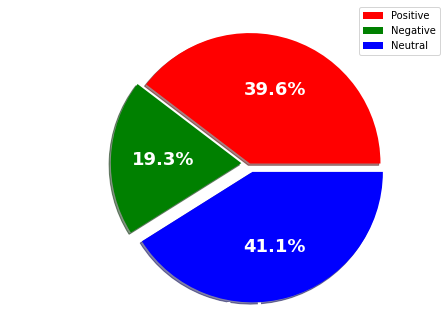

In [ ]:
# visualize sentiment distribution in pie plot

colors = ['red','green','blue']
sizes = [positive.shape[0]/df.shape[0],negative.shape[0]/df.shape[0],neutral.shape[0]/df.shape[0]]
explode = [0,0.1,0.1]
labels = ['Positive','Negative','Neutral']
plt.pie(x=sizes,labels=labels,explode=explode,colors=colors,shadow=True,radius=1.5,\
        center=(-0.5,1),autopct='%1.1f%%',textprops={'fontsize': 18,'color':'white','weight':'bold'})
plt.legend(loc=(1,1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


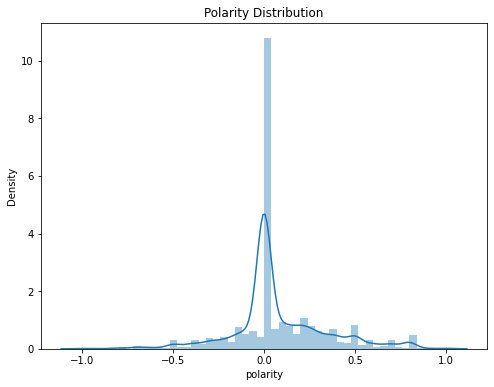

In [ ]:
# polarity distribution

plt.figure(figsize=(8,6))
plt.title('Polarity Distribution')
sns.distplot(df['polarity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


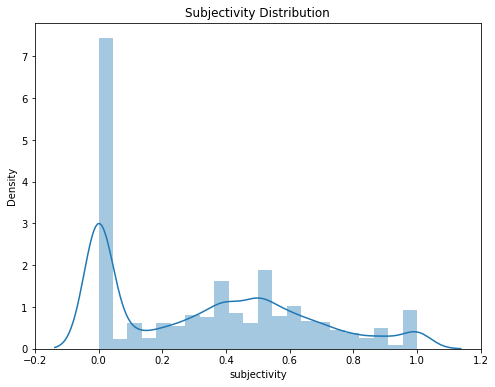

In [ ]:
#subjectivity distribution

plt.figure(figsize=(8,6))
plt.title('Subjectivity Distribution')
sns.distplot(df['subjectivity'])
plt.show()

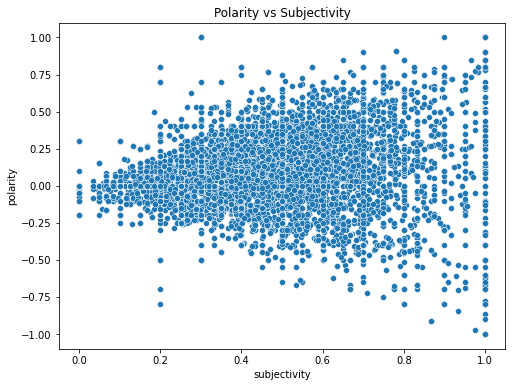

In [ ]:
# scatter plot of polarity scores vs subjectivity scores

## polarity and subjectivity
plt.figure(figsize=(8,6))
plt.title('Polarity vs Subjectivity')
sns.scatterplot(data= df,x="subjectivity",y="polarity")
plt.show()

The funnel-shaped plot of polarity vs subjectivity is expected since a more subjective text is more likely to be emotional.

### Explore the Neutral, Positive, and Negative Texts

The language barrier is the main challenge in classifying texts into the respective sentiment classes. Some of the tweets are combined English and Swahili, and some are structured in that there are positive parts and negative parts. 
We will randomly sample some of the tweets and manually evaluate if they are correctly classified or not.

In [ ]:
# positive tweets

random_positives = positive.sample(n=5, random_state=101)

for i,tweet in enumerate(random_positives['tweet_text']):
    print(i+1, tweet, '\n')

1 woman have more to gain in kenya kwanza than azimio azimio have one woman as a running mate on the other hand kenya kwanza have designate 10 cabinet position to be occupy by woman chosewisely 

2 kenya kwanza couple right now limo39 

3 early boss uhuru be against raila this time ruto kigeugeu karuanonumbers 

4 if kenya kwanza be able to convince kalonzo then will win by a landslide for now ruto be poise to get about 53 54 of the vote which still put first 

5  jkl kindly stop ask question like do believe woman will vote for those be question from dimwit in and karua s integrity be second to none or do simply say kaburu d o during moi era 



In [ ]:
# negative tweets

random_negatives = negative.sample(n=5, random_state=101)

for i,tweet in enumerate(random_negatives['tweet_text']):
    print(i+1, tweet, '\n')

1 those who be overly cynical about the performance of prefer presidential candidate be the same people who demean and do a hatchet job on electable candidate with unbeatable and obvious potential to lead kenya like raila and martha railasrunningmate babanamartha 

2 what sonko do be terrible dangerous the man be unfit for any public office kalonzo be unfit to be deputy president in azimio govt sonko boss pendulum should not appear on any azimio ballot paper be do what skm task to do rutodecides ndindi nyoro 

3 be all go to ignore how rigathi look a whole lot like the former late p never mind 

4 before ruto sit on that kenyan throne must repent fully and tell the people of kenya all the evil have do to the country since yk92 and should remember very well the bible say not all those who shout bwana asifiwe loud that inherit the kingdom of god 

5 kalonzo be such a funny character s in out then in again out and then out now ask for amendment of coalition agreement to append name as chi

#### WordClouds of Negative and Positive Texts

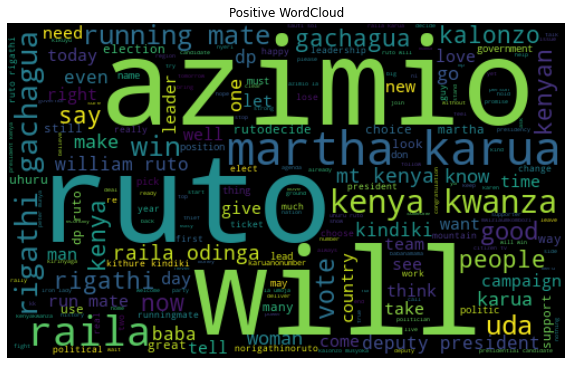

In [ ]:
# positive wordcloud

all_words = ' '.join(twts for twts in positive['tweet_text'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Positive WordCloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

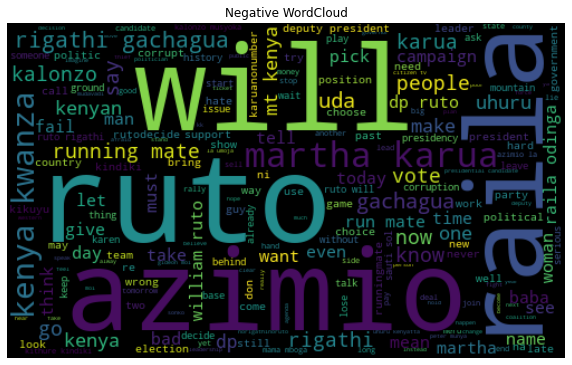

In [ ]:
# negative wordcloud

all_words = ' '.join(twts for twts in negative['tweet_text'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Negative WordCloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

The salient words are the names of the presidential front-runners, Ruto and Raila, their political parties and their deputies. There is an overlap of words in both contexts, probably due to diverse opinions across the political divide. Raila supporters are more likely to have negative opinions on Ruto and vice versa.



## 2. Emotion Analysis

Emotion analysis is the process of identifying and analyzing the underlying emotions expressed in textual data. Emotions include; fear, anger, happiness, sadness, love, inspiration, or neutral.

#### **EmoRoberta**

This section will use transformer-based models to analyze subjective information and understand its emotions. The model of choice is EmoRoberta from Hugging Face transformers API. 

EmoRoberta leverages Roberta to perform Emotion classification into 28 categories of Emotion. RoBERTa builds on BERT’s language masking strategy and modifies key hyperparameters in BERT, including removing BERT’s next-sentence pretraining objective and training with much larger mini-batches and learning rates. RoBERTa was also trained on more data than BERT for a longer time. 

In [ ]:
#  install the hugging face transformer pipeline

!pip install transformers -q

     |████████████████████████████████| 4.2 MB 2.8 MB/s 
     |████████████████████████████████| 596 kB 72.5 MB/s 
     |████████████████████████████████| 6.6 MB 39.6 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 


In [ ]:
#  import transformer pipeline

from transformers import pipeline



In [ ]:
# download emoroberta
# we define emotion variable

emotion = pipeline('sentiment-analysis',model='arpanghoshal/EmoRoBERTa', device=1)

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
%time
# test the emotion function

text = df.iloc[0]['tweet_text']

emotions = emotion(text)
print(f"The emotion is {emotions[0]['label']} with score of {emotions[0]['score']}")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
The emotion is neutral with score of 0.5608711838722229


In [ ]:
# extract emotions and emotion score of each tweet

## Define Emotion factions

def get_emotion_label (text):
  """ Function to get the emotion lables score. 

  Parameters
  ----------
  tweet: str
    tweet text
    
  Returns
  -------
  emotion: str
    emotion label
    
  """

  return (emotion(text)[0]['label'])


def get_emotion_score (text):
  """ Function to get the emotion score. 

  Parameters
  ----------
  tweet: str
    tweet text
    
  Returns
  -------
  score : float
    emotion score.
    
  """

  return (emotion(text)[0]['score'])

In [ ]:
#  apply the emotion functions on the tweet texts

df['emotion_label'] = df['tweet_text'].apply(get_emotion_label)
df['emotion_score'] = df['tweet_text'].apply(get_emotion_score)

df.head(2)

,Unnamed: 0,date,author_id,tweet_id,tweet_text,length_tweet,subjectivity,polarity,sentiment,emotion_label,emotion_score
0,0,2022-05-14 23:59:25+00:00,2942181101,1525626872113029120,good morning kenya main reasons why kenya kwan...,97,0.588889,0.433333,positive,neutral,0.560871
1,1,2022-05-14 23:59:10+00:00,426949133,1525626808493801472,jimmy kibaki speak on ditch uhuru for dp ruto ...,78,0.666667,-0.700000,negative,disgust,0.425593


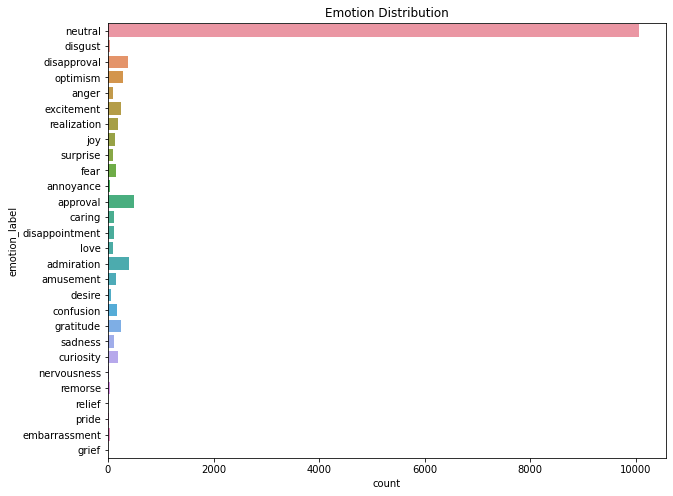

In [ ]:
# distribution of emotions

plt.figure(figsize=(10,8))
plt.title('Emotion Distribution')
sns.countplot(data=df,y='emotion_label')
plt.show()

In [ ]:
# value counts for the emotion label

df['emotion_label'].value_counts()

neutral           10070
approval            498
admiration          406
disapproval         376
optimism            279
excitement          247
gratitude           244
realization         199
curiosity           181
confusion           172
amusement           148
fear                146
joy                 137
caring              122
disappointment      119
sadness             108
surprise            101
anger                91
love                 90
desire               62
annoyance            47
remorse              34
disgust              30
embarrassment        30
pride                19
nervousness          18
relief                6
grief                 3
Name: emotion_label, dtype: int64

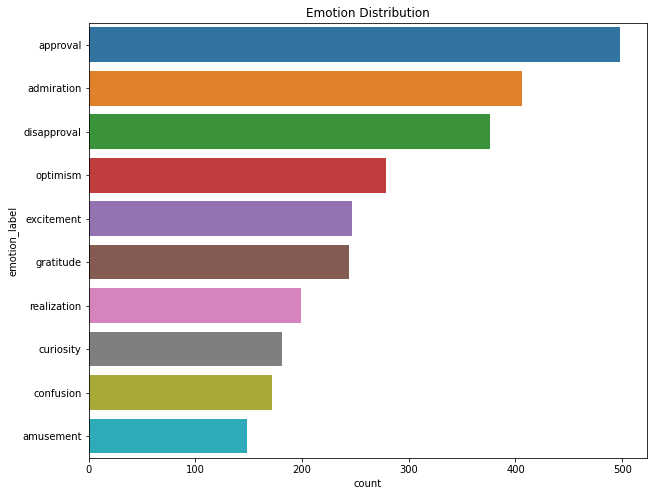

In [ ]:
# Take out dominating neutral and ploting the top 10 emotions

df_not_neutral = df[~df['emotion_label'].isin(['neutral'])]

descending_order = df_not_neutral['emotion_label'].value_counts().sort_values(ascending=False).index[:10]

plt.figure(figsize=(10,8))
plt.title('Emotion Distribution')
sns.countplot(data=df_not_neutral,y='emotion_label',order=descending_order)
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Summer2022/emotion_sentiment_analysis.csv', index=False)

In [ ]:
hj

NameError: ignored